In [2]:
# Getting raw data
import ARPC
test = ARPC.Arpc(name='Regular Split no augmentation')
test.load_data('../../dataset/data',
               'Aluno<participante:\d+>/<atividade:[A-Z][a-z]*><intensidade:[A-Z][a-z]*>.txt')
test.raw_data

,x,y,z,tempo,sensor,participante,atividade,intensidade
67868,1.889163,-2.724721,-1.084811,26,g,1,Andando,Leve
67869,7.831434,-4.066552,2.339734,28,a,1,Andando,Leve
67870,0.308316,-0.583595,0.731726,30,r,1,Andando,Leve
67871,1.161321,-2.316458,-1.140205,39,g,1,Andando,Leve
67872,7.611766,-2.640805,1.070807,42,a,1,Andando,Leve
...,...,...,...,...,...,...,...,...
19285,0.225796,0.387085,-0.256845,59801,r,9,Sentado,Vigoroso
19286,-0.006691,0.006200,0.019383,59988,g,9,Sentado,Vigoroso
19287,-7.234080,1.695095,5.764041,59994,a,9,Sentado,Vigoroso
19288,0.226507,0.386893,-0.256038,59997,r,9,Sentado,Vigoroso


In [3]:
# Preprocessing data
import manips
import arpc_utils as au
test.add_manip(au.get_acc_data)
test.add_manip(lambda x: manips.fix_dup(x, remFirst=True))
classes = [(1., 'Deitado', 'Moderado')]
classes += [(4., 'Deitado', i) for i in ['Leve', 'Moderado', 'Vigoroso']]
classes += [(7., 'Deitado', i) for i in ['Leve', 'Moderado', 'Vigoroso']]
test.add_manip(lambda x: manips.rotate_class(x, classes, [0, 0, 1]))
test.add_manip(manips.remove_outliers)
test.add_manip(manips.remove_beginning)
test.add_manip(manips.scale_data)
test.add_manip(manips.set_vec_module)
test.do_manip()
test.preprocessed_data

,x,y,z,tempo,sensor,atividade,intensidade,participante,module
0,1.660363,-0.374177,-1.283886,10093,a,Andando,Leve,1,2.131942
1,1.646849,-0.378761,-1.285337,10289,a,Andando,Leve,1,2.123126
2,1.655668,-0.377730,-1.281915,10489,a,Andando,Leve,1,2.127727
3,1.647765,-0.376928,-1.287204,10691,a,Andando,Leve,1,2.124641
4,1.635969,-0.366383,-1.289797,10890,a,Andando,Leve,1,2.115232
...,...,...,...,...,...,...,...,...,...
25413,-1.473839,-0.074585,0.524854,59191,a,Sentado,Vigoroso,9,1.566281
25414,-1.487239,-0.047995,0.534290,59392,a,Sentado,Vigoroso,9,1.581028
25415,-1.483345,-0.059341,0.532009,59592,a,Sentado,Vigoroso,9,1.576980
25416,-1.467196,-0.048797,0.549534,59798,a,Sentado,Vigoroso,9,1.567493


In [7]:
# Segment  data
test.set_windows(size=30) # 3 segundos de dados
test.segmented_data.keys(), test.segmented_data['1AndandoLeve'][:3]

(dict_keys(['1AndandoLeve', '10AndandoLeve', '11AndandoLeve', '2AndandoLeve', '3AndandoLeve', '4AndandoLeve', '5AndandoLeve', '6AndandoLeve', '7AndandoLeve', '8AndandoLeve', '9AndandoLeve', '1AndandoModerado', '10AndandoModerado', '11AndandoModerado', '2AndandoModerado', '3AndandoModerado', '4AndandoModerado', '5AndandoModerado', '6AndandoModerado', '7AndandoModerado', '8AndandoModerado', '9AndandoModerado', '1AndandoVigoroso', '10AndandoVigoroso', '11AndandoVigoroso', '2AndandoVigoroso', '3AndandoVigoroso', '4AndandoVigoroso', '5AndandoVigoroso', '6AndandoVigoroso', '7AndandoVigoroso', '8AndandoVigoroso', '9AndandoVigoroso', '1DeitadoLeve', '10DeitadoLeve', '11DeitadoLeve', '2DeitadoLeve', '3DeitadoLeve', '4DeitadoLeve', '5DeitadoLeve', '6DeitadoLeve', '7DeitadoLeve', '8DeitadoLeve', '9DeitadoLeve', '1DeitadoModerado', '10DeitadoModerado', '11DeitadoModerado', '2DeitadoModerado', '3DeitadoModerado', '4DeitadoModerado', '5DeitadoModerado', '6DeitadoModerado', '7DeitadoModerado', '8Deit

In [9]:
# Extracting features
import numpy as np
test.set_features([np.mean, np.std], columns=['x', 'y', 'z', 'module'])
test.featured_data

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%
100%


,mean_x,mean_y,mean_z,mean_module,tempo,sensor,atividade,intensidade,participante,std_x,std_y,std_z,std_module
0,1.649999,-0.377363,-1.285693,2.125548,13089,a,Andando,Leve,1,0.006595,0.004692,0.003441,0.005449
1,1.649678,-0.377546,-1.285673,2.125318,13285,a,Andando,Leve,1,0.006311,0.004671,0.003454,0.005319
2,1.649743,-0.377210,-1.285597,2.125264,13487,a,Andando,Leve,1,0.006292,0.004927,0.003485,0.005349
3,1.649521,-0.377336,-1.285683,2.125166,13688,a,Andando,Leve,1,0.006196,0.004987,0.003424,0.005330
4,1.649743,-0.377455,-1.285552,2.125280,13884,a,Andando,Leve,1,0.006247,0.005018,0.003439,0.005354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,-1.482959,-0.056086,0.538134,1.578784,56399,a,Sentado,Vigoroso,9,0.015513,0.016334,0.018004,0.013206
22543,-1.482391,-0.055261,0.539358,1.578614,56597,a,Sentado,Vigoroso,9,0.015025,0.016095,0.016381,0.013143
22544,-1.482635,-0.054898,0.538383,1.578491,56799,a,Sentado,Vigoroso,9,0.014979,0.015875,0.015912,0.013141
22545,-1.481612,-0.054341,0.539583,1.577913,56997,a,Sentado,Vigoroso,9,0.014951,0.015785,0.015341,0.013230


In [10]:
# Actual classification
import arpc_classification as ac
participantes = [str(i) for i in range(1, 12)]
test.classify(ac.train_randomforest, ac.eval_randomforest,
              lambda x: ac.multi_split(x, ac.data_split1, participantes))
test = test.start_new_exp(reuse='featured', name='LOSO split no augmentation')
test.classify(ac.train_randomforest, ac.eval_randomforest,
              lambda x: ac.multi_split(x, ac.loso_split, participantes))
test = test.start_new_exp(reuse='featured', name='Semi LOSO split no augmentation')
test.classify(ac.train_randomforest, ac.eval_randomforest,
              lambda x: ac.multi_split(x, ac.semi_loso_split, participantes))

In [11]:
# Now augmenting segmented data
test = test.start_new_exp(reuse='segmented', name='Split comum com aumento de dados')
from TimeWarpWindow import warp_window
def timewarped(df):
    result, _ = warp_window(df, 5) # A margem para definir um centro pro algoritmo
    return result

test.apply_each_window(funcs=[timewarped])

applying timewarped to 1AndandoLeve data
applying timewarped to 10AndandoLeve data
applying timewarped to 11AndandoLeve data
applying timewarped to 2AndandoLeve data
applying timewarped to 3AndandoLeve data
applying timewarped to 4AndandoLeve data
applying timewarped to 5AndandoLeve data
applying timewarped to 6AndandoLeve data
applying timewarped to 7AndandoLeve data
applying timewarped to 8AndandoLeve data
applying timewarped to 9AndandoLeve data
applying timewarped to 1AndandoModerado data
applying timewarped to 10AndandoModerado data
applying timewarped to 11AndandoModerado data
applying timewarped to 2AndandoModerado data
applying timewarped to 3AndandoModerado data
applying timewarped to 4AndandoModerado data
applying timewarped to 5AndandoModerado data
applying timewarped to 6AndandoModerado data
applying timewarped to 7AndandoModerado data
applying timewarped to 8AndandoModerado data
applying timewarped to 9AndandoModerado data
applying timewarped to 1AndandoVigoroso data
apply

In [12]:
# Extracting features from augmented data 
test.set_features([np.mean, np.std], columns=['x', 'y', 'z', 'module'])

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%
100%


In [13]:
# Classifiying augmented features
test.classify(ac.train_randomforest, ac.eval_randomforest,
              lambda x: ac.multi_split(x, ac.data_split1, participantes))
test = test.start_new_exp(reuse='featured', name='Split LOSO com aumento de dados')
test.classify(ac.train_randomforest, ac.eval_randomforest,
              lambda x: ac.multi_split(x, ac.loso_split, participantes))
test = test.start_new_exp(reuse='featured', name='Split semi LOSO com aumento de dados')
test.classify(ac.train_randomforest, ac.eval_randomforest,
              lambda x: ac.multi_split(x, ac.semi_loso_split, participantes))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


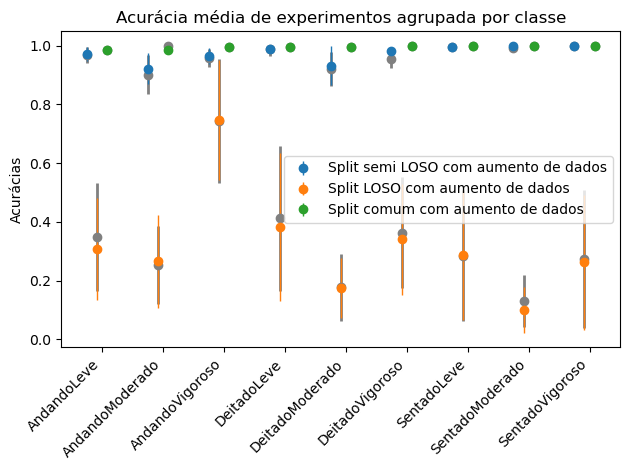

In [14]:
# plot com um dos plots em cinza por traz
import arpc_plot as ap
import arpc_metrics as am
ap.plot_compare_2_set_of_exps(test, 3, am.get_label_accuracy_mean, lambda x: x.confusion_matrixes[0][1]) 